L2-error = 0.0464853320904168 degree = 3 Nel = 8
L2-error = 0.0009162016959651037 degree = 3 Nel = 16
L2-error = 3.060395082313451e-05 degree = 3 Nel = 32
L2-error = 1.6281299794210147e-06 degree = 3 Nel = 64
L2-error = 9.758017330535905e-08 degree = 3 Nel = 128


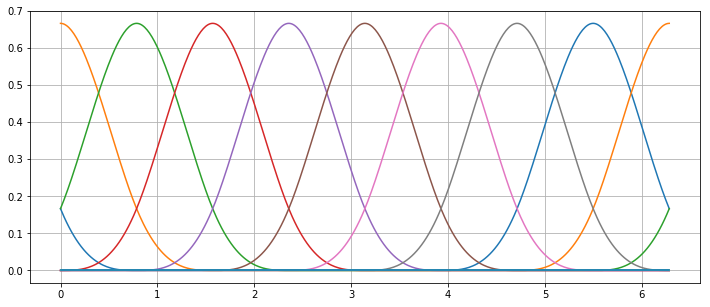

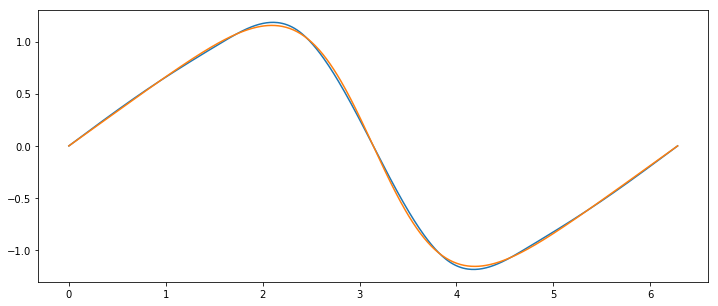

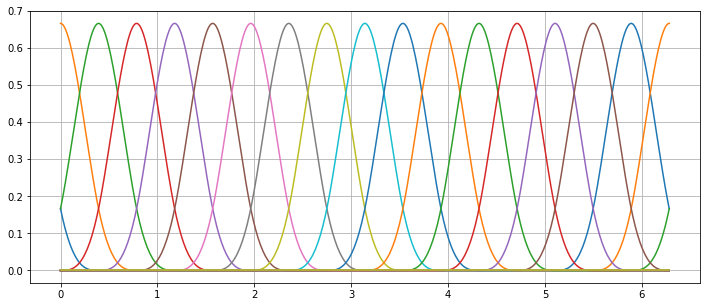

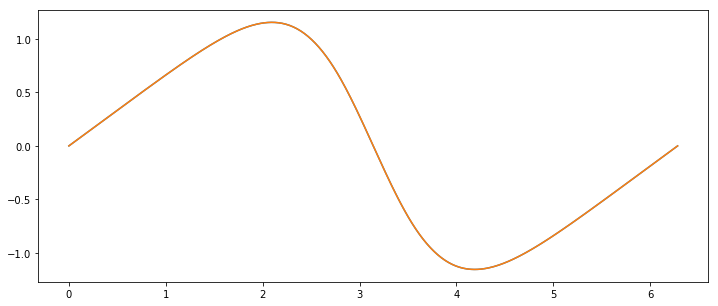

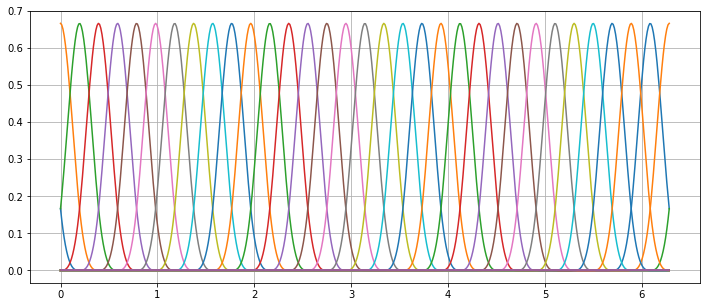

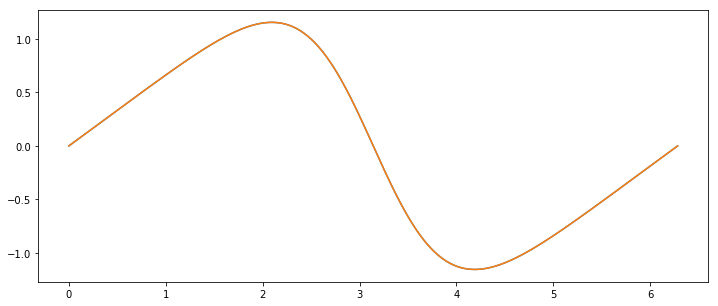

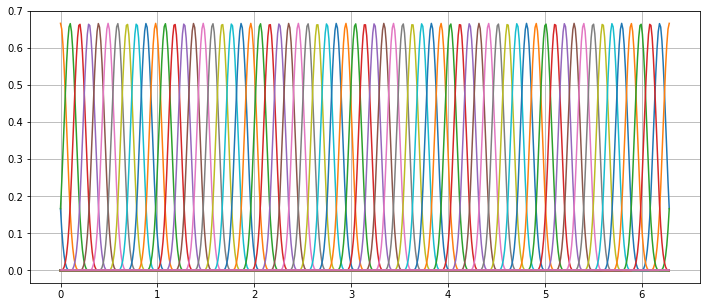

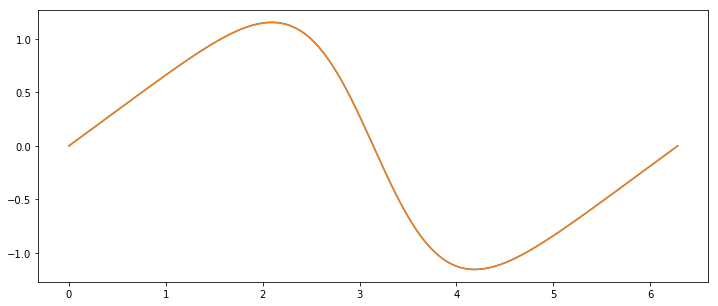

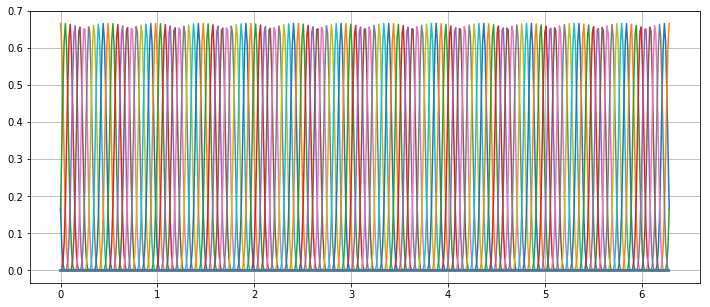

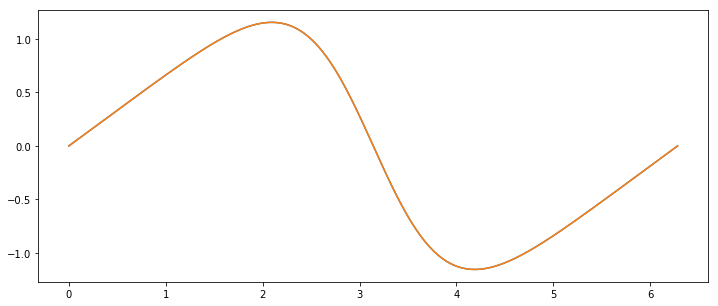

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad
from Utils_Dipole.createBasis import createBasis
from Utils_Dipole.L2Projection import L2proj
from Utils_Dipole.matrixAssembly import matrixAssembly
from Utils_Dipole.evaluation import evaluation


# ... the function we want to project:
fun = lambda x: 1/(0.5*np.cos(x) + 1)*np.sin(x)
# ...

# ... parameters:
L = 2*np.pi
nel = 4
p = 3
el_b = np.linspace(0, L, nel + 1)

def B0(z):
    return 0*z
# ...

# ... Finite Element basis and matrix assembly:
bsp,N,quad_points,weights = createBasis(L,nel,p,1)
M = matrixAssembly(bsp,p,nel,weights,quad_points,B0,1)[0]
fj = L2proj(bsp,nel,p,L,quad_points,weights,M,fun,1)
# ...

testvec = np.zeros(N)



def fh1(fj,x,nel):
    u = 0
    for i in range(0,N):
        u += fj[i%nel]*bsp(x,i)
        
    return u

def fh2(fj,x,el_b):
    
    bins = np.digitize(x,el_b)
    funval = np.zeros(len(x))
    
    for i in range(len(x)):
        for il in range(0,p+1):
            
            index = bins[i] - 1  + il
            
            funval[i] += fj[index%N]*bsp(x[i],index)
            
    return funval

        
    



# loop over different number of elements (mesh resolution):
cases = 5
L2error = np.zeros(cases)
Nel_vec = np.zeros(cases)
x = np.linspace(0,L,500)

for i in range(3, 3 + cases):
    
    Nel = 2**i
    el_b = np.linspace(0, L, Nel + 1)
    
    bsp,N,quad_points,weights = createBasis(L,Nel,p,1)
    testvec = np.zeros(N) 
    
    M = matrixAssembly(bsp,p,Nel,weights,quad_points,B0,1)[0]
    fj = L2proj(bsp,Nel,p,L,quad_points,weights,M,fun,1)
    
    fig, ax1 = plt.subplots(figsize=(12, 5))
    fig, ax2 = plt.subplots(figsize=(12, 5))

    
    for j in range(N):   
        testvec[:] = 0 
        testvec[j] = 1
        # coeficients of the projection

        
        ax1.plot(x, fh1(testvec,x,Nel))
        ax1.grid()
        


    ax2.plot(x, fh1(fj,x,Nel))
    ax2.grid()

    ax2.plot(x, fun(x))
    ax2.grid()
        
    # L2-error:
    Nel_vec[i - 3] = Nel
    L2error[i - 3] = 0
    
    integrand = lambda x: abs(fh1(fj,x,Nel) - fun(x))**2
    for k in range(Nel):
        L2error[i - 3] += fixed_quad(integrand, el_b[k], el_b[k + 1])[0]

    L2error[i - 3] = np.sqrt(L2error[i - 3 ]) 
    print('L2-error =', L2error[i - 3], 'degree =', p, 'Nel =', Nel)
    

In [10]:
bsp.greville()

array([-0.04908739,  0.        ,  0.04908739,  0.09817477,  0.14726216,
        0.19634954,  0.24543693,  0.29452431,  0.3436117 ,  0.39269908,
        0.44178647,  0.49087385,  0.53996124,  0.58904862,  0.63813601,
        0.68722339,  0.73631078,  0.78539816,  0.83448555,  0.88357293,
        0.93266032,  0.9817477 ,  1.03083509,  1.07992247,  1.12900986,
        1.17809725,  1.22718463,  1.27627202,  1.3253594 ,  1.37444679,
        1.42353417,  1.47262156,  1.52170894,  1.57079633,  1.61988371,
        1.6689711 ,  1.71805848,  1.76714587,  1.81623325,  1.86532064,
        1.91440802,  1.96349541,  2.01258279,  2.06167018,  2.11075756,
        2.15984495,  2.20893233,  2.25801972,  2.3071071 ,  2.35619449,
        2.40528188,  2.45436926,  2.50345665,  2.55254403,  2.60163142,
        2.6507188 ,  2.69980619,  2.74889357,  2.79798096,  2.84706834,
        2.89615573,  2.94524311,  2.9943305 ,  3.04341788,  3.09250527,
        3.14159265,  3.19068004,  3.23976742,  3.28885481,  3.33

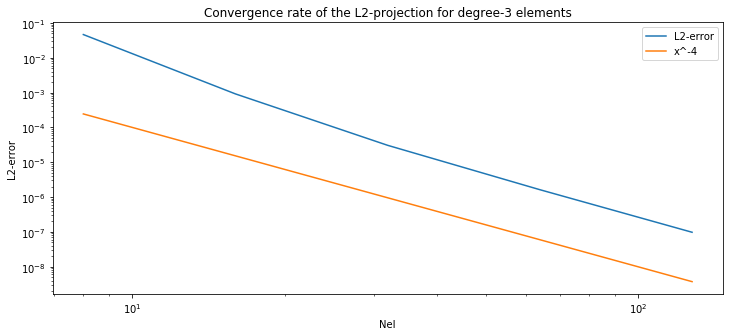

In [3]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.loglog(Nel_vec, L2error, label='L2-error')
ax.loglog(Nel_vec, Nel_vec**(-(p + 1)), label='x^' + str(-p-1))
ax.set(title='Convergence rate of the L2-projection for degree-' + str(p) 
       + ' elements', xlabel='Nel', ylabel='L2-error')
ax.legend()

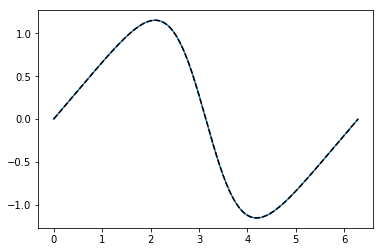

In [3]:
plt.plot(x,evaluation(fj,bsp,x,p))
plt.plot(x,fun(x),'k--')

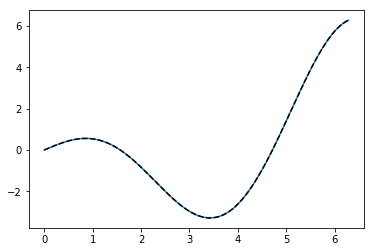

In [8]:
# ... the function we want to project:
fun2 = lambda x: x*np.cos(x)
# ...

# ... parameters:
L = 2*np.pi
nel = 8
p = 3
el_b = np.linspace(0, L, nel + 1)

def B0(z):
    return 0*z

def damp(z):
    return 0*z

def dz_damp(z):
    return 0*z
# ...

# ... Finite Element basis and matrix assembly:
bsp,N,quad_points,weights = createBasis(L,nel,p,2)
M = matrixAssembly(bsp,p,nel,weights,quad_points,B0,2,damp,dz_damp)[0]
fj = L2proj(bsp,nel,p,L,quad_points,weights,M,fun2,2)
# ...

testvec = np.zeros(N)



def fh1(fj,x,nel):
    u = 0
    for i in range(0,N):
        u += fj[i%nel]*bsp(x,i)
        
    return u

def fh2(fj,x,el_b):
    
    bins = np.digitize(x,el_b)
    funval = np.zeros(len(x))
    
    for i in range(len(x)):
        for il in range(0,p+1):
            
            index = bins[i] - 1  + il
            
            funval[i] += fj[index%N]*bsp(x[i],index)
            
    return funval

x = np.linspace(0,L,200)
plt.plot(x,evaluation(fj,bsp,x,p))
plt.plot(x,fun2(x),'k--')

In [18]:
test = np.array([1,2,3])

In [15]:
list(test)

[1, 2, 3]

In [17]:
np.array([0] + list(test) + [0])

array([0, 1, 2, 3, 0])

In [20]:
np.repeat(test,6)

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3])